# HYPOTHESIS TESTING EXERCISE

The aim of this notebook exercise is to demonstrate how **hypothesis testing** is a powerful tool that can be used to acertain claims that are made on a population by focusing on a representative sample

# Problem Statement

Autolib was an electric cab company operating France. At the height of its operation the management had a feeling that Bluecar, one of its cabs services had more cars taken from Postal Area 75015 than from Postal Area 75017 during the WeekDay. Our focus shall be to prove whether this claim is True through:

  1. Exploratory analysis for the whole data
  2. Taking a sample data and performing a hypothesis test

**Null Hypothesis**: Same number of cars are taken from Postal Area 75015 and Postal Area 75017 during the weekday
    
    H0: µ1 = µ2

**Alternate Hypothesis**: More cars are taken from postal area 75015 than from postal area 75017 during the weekday

    H1: µ1 > µ2


## Loading the Data

In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# Loading the dataset
df = pd.read_csv('/content/autolib_daily_events_postal_code(1).csv')

In [9]:
# General information on the data
# No misssing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [10]:
# Snip View of the data
df.head(7)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34


## Cleaning the data

In [12]:
# Dropping columns not required for this study
df = df.drop(['n_daily_data_points', 'Slots_freed_sum', 'Slots_taken_sum', 'Utilib_taken_sum',
              'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
              'Slots_freed_sum', 'Slots_taken_sum', 'date', 'dayOfWeek', 'BlueCars_returned_sum'], axis = 1)

In [13]:
# Dropping duplicates if any
df = df.drop_duplicates()

In [14]:
# Checking our new DataFrame
df.head(7)

,Postal code,day_type,BlueCars_taken_sum
0,75001,weekday,110
1,75001,weekday,98
2,75001,weekday,138
3,75001,weekday,104
4,75001,weekday,114
5,75001,weekend,187
6,75001,weekend,180


In [15]:
# Checking the datatypes
df.dtypes

Postal code            int64
day_type              object
BlueCars_taken_sum     int64
dtype: object

## 1. Exploratory Analysis of the claim

Since there is a general feeling that there is an averagely the same number of Bluecar taken from Postal Areas 75015 and 75017, our focus here is to compute the average number of the Bluecars taken from the two areas. We will also look at the distributions of both.

From the two we shall then make a conclusion that is to be compared with the results from the null hypothesis that is to follow later on.

In [17]:
# A function to plot the distributions of a data set
def plot_distribution(inp):
  plt.figure()
  ax = sns.distplot(inp)
  plt.axvline(np.mean(inp), color='k', linestyle='dashed', linewidth=5)
  _, max_ = plt.ylim()
  plt.text(
      inp.mean() + inp.mean()/10,
      max_ - max_/10,
      "Mean: {:.2f}".format(inp.mean())
  )
  return plt.figure()

### Plotting Distributions of taking the cabs in both the postal code areas

<Figure size 432x288 with 0 Axes>

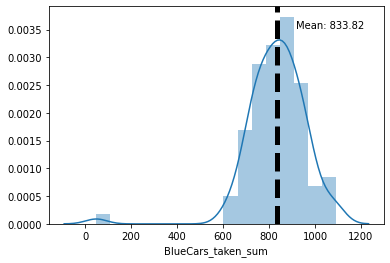

<Figure size 432x288 with 0 Axes>

In [21]:
# Plotting distribution of Bluecar taken from Area Code 75015 during the weekday
taken_area1 = df[(df['Postal code'] == 75015) & (df.day_type == 'weekday')]['BlueCars_taken_sum']
plot_distribution(taken_area1)

<Figure size 432x288 with 0 Axes>

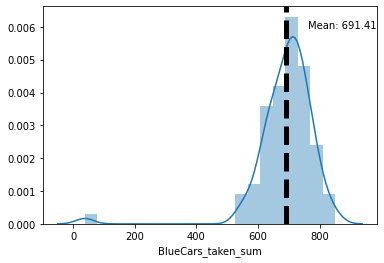

<Figure size 432x288 with 0 Axes>

In [22]:
# Plotting distribution of Bluecar taken from Area Code 75017 during the weekday
taken_area2 = df[(df['Postal code'] == 75017) & (df.day_type == 'weekday')]['BlueCars_taken_sum']
plot_distribution(taken_area2)

### Comparing the counts of cabs taken over time

In [23]:
print('Postal Code 75015: ', taken_area1.sum())
print('Postal Code 75017: ', taken_area2.sum())

Postal Code 75015:  80047
Postal Code 75017:  56696


In [24]:
# Other measures Postal Area 75015
taken_area1.describe()

count      96.000000
mean      833.822917
std       131.560032
min        49.000000
25%       762.250000
50%       836.000000
75%       910.250000
max      1093.000000
Name: BlueCars_taken_sum, dtype: float64

In [25]:
# Other measures Postal Area 75017
taken_area2.describe()

count     82.000000
mean     691.414634
std       96.964414
min       38.000000
25%      652.000000
50%      704.000000
75%      741.750000
max      850.000000
Name: BlueCars_taken_sum, dtype: float64

**Observations/Findings**
* From the averages, more cabs are taken from postal area code 75015 than 75017. THerefore, the feeling by the management is FALSE.
* The graphs of distribution of data from the two Postal Codes areas indicate that the pattern of taking cabs follow the same distribution.


## 2. **Taking a sample data and performing a hypothesis test**

Here we shall perform the following:

* Pick samples for Postal code area 75015 and 75017 of size n = 20 using simple random sampling technique
* Since the sample size set is 20, compute **t-statistic** for each
* Compute the corresponding **p-value** to the t-statistic
* Compare the p-value to our set significance level of **α = 0.05**
* Draw conclusion from the comparison

### **Sampling**

In [36]:
# Taking records from Postal Area 75015 and Postal Area 75017
population = df[(df['Postal code'] == 75015) |  (df['Postal code'] == 75017)]
population.head()

,Postal code,day_type,BlueCars_taken_sum
2184,75015,weekday,781
2185,75015,weekday,710
2186,75015,weekday,739
2187,75015,weekday,669
2188,75015,weekday,852


Sample for Postal Area 75015


In [37]:
# Sampling from postal area 75015
sample_015 = population[population['Postal code'] == 75015]['BlueCars_taken_sum'].sample(20)
sample_015.head(5)

2246     805
2243     999
2192     791
2250    1038
2333     920
Name: BlueCars_taken_sum, dtype: int64

Sample for Postal Area 75017

In [38]:
# Sampling from postal area 75017
sample_017 = population[population['Postal code'] == 75017]['BlueCars_taken_sum'].sample(20)
sample_017.head(5)

2564    680
2540    739
2601    602
2648    859
2618    752
Name: BlueCars_taken_sum, dtype: int64

### **Hypothesis testing**

Since we want to compare means of data sampled from the two postal codes, our sample shall be labelled as follows:

1. *sample_015:* sample taken from Postal area 75015 with sample size **n1 = 20**

2. *sample_017:* sample taken from Postal area 75017 with sample size **n2 = 20**


In [39]:
# Assumption on the model
# significance level is 0.05
sig_level = 0.05

In [56]:
# Computing mean and standard deviation for samples
# sample_015
mean1 = sample_015.mean()
sdev1 = sample_015.std()

# sample_017
mean2 = sample_017.mean()
sdev2 = sample_017.std()

In [41]:
# calculating the t-statistic
t = (mean1 - mean2)/((sdev1**2/20) + (sdev2**2/20))**0.5
print('t-statistic: ', t)

t-statistic:  3.612351410828048


In [42]:
## Compare with the critical t-value
#Degrees of freedom factoring that our sample size was 20 in each case
df = 2*20 - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

print('p-value: ', p)

p-value:  0.00043757678334954697


In [43]:
# Comparing p value to the alpha value
if p < sig_level:
  print('REJECT NULL HYPOTHESIS')
if p >= sig_level:
  print('ACCEPT NULL HYPOTHESIS')

REJECT NULL HYPOTHESIS


**Outcome**

* Our **t-test** values is **3.612351410828048**
* The corresponding **p-value** is **0.00043757678334954697**
* With our significance level set at 5%, **P -value < significance Level** we reject the null hypothesis.


### **Interpretation of the Test of Hypothesis Outcomes**

We reject the claim that there is averagely the same number of cabs taken from Postal Code Areas 75015 and 75017.

Clearly this finding corresponds to our earlier finding where we used the entire population.

### Power of the test

**Power test** is used to report confidence in the conclusions drawn from the results of an experiment.

    Power = Pr(reject H0 | H1 is true) = 1 - Pr(fail to reject H0 | H0 is false)


In [68]:
# Effect size for the power test calculation
# Cohen's d for independent samples
from numpy import var, mean
from math import sqrt

def cohend(d1, d2):
  # calculate the size of samples
  n1, n2 = len(d1), len(d2)
  # calculate the variance of the samples
  s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
  # calculate the pooled standard deviation
  s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
  # calculate the means of the samples
  u1, u2 = mean(d1), mean(d2)
  # calculate the effect size
  effect_size = (u1 - u2) / s

  return effect_size

In [69]:
from statsmodels.stats.power import tt_ind_solve_power

effect_size = cohend(sample_015, sample_017) # Using the cohend function defined above to calculate the effect_size
alpha = 0.05
power = tt_ind_solve_power(effect_size=effect_size, nobs1=20, alpha=alpha, ratio=1)
print("The statistical power is: {0}".format(power))

The statistical power is: 0.9405818256581903


* We are 94% confident with the result above
* Power = Pr(reject H0 | H1 is true) = 0.94
* Maybe for even a higher score, the sample size should be increased a bit.